# **Data Cleaning Processes**

## Outlier Detection & Techniques

Outlier detection is a crucial step in data preprocessing to identify and handle anomalous data points that deviate significantly from the rest of the dataset. Outliers can distort statistical analysis and degrade machine learning model performance. This covers popular outlier detection techniques with examples in Python.

### 1. **Using Z-Score** 

The Z-Score method measures how many standard deviations a data point is from the mean. `Points with a Z-Score greater than a threshold (e.g., 3) are considered outliers.`

#### Example:

In [119]:
import numpy as np 
from scipy.stats import zscore 

# Sample dataset 
data = [10, 12, 13, 12, 11, 10, 100]

# Calculate Z-Scores 
z_scores = zscore(data) 
print(z_scores)

# Identify outliers 
threshold = 2 
outliers = np.where(np.abs(z_scores) > threshold) 
print("Outliers:", outliers) 

[-0.45097647 -0.38655126 -0.35433866 -0.38655126 -0.41876387 -0.45097647
  2.448158  ]
Outliers: (array([6]),)


#### Key Points:

- Works well for normally distributed data.

- Sensitive to extreme outliers as they affect mean and standard deviation.

###
---

### 2. **Using IQR (Interquartile Range)**

The IQR method identifies outliers based on the spread of the data (i.e., the range between the first and third quartiles). `Data points outside 1.5 * IQR from the quartiles are flagged as outliers.`

#### Example:

In [120]:
import numpy as np 

# Sample dataset 
data = [10, 12, 13, 12, 11, 10, 100] 

# Calculate Q1, Q3, and IQR 
q1 = np.percentile(data, 25) 
q3 = np.percentile(data, 75) 
iqr = q3 - q1 

# Determine outlier boundaries 
lower_bound = q1 - 1.5 * iqr 
upper_bound = q3 + 1.5 * iqr 

# Identify outliers 
outliers = [x for x in data if x < lower_bound or x > upper_bound] 
print("Outliers:", outliers) 

Outliers: [100]


#### Key Points:

- Effective for skewed or non-normal data.

- Not influenced by extreme outliers.

###
---

### 3. **Isolation Forest**

The Isolation Forest algorithm isolates outliers by creating random splits in the data. `Points that require fewer splits to isolate are more likely to be outliers.`

#### Example:

In [121]:
from sklearn.ensemble import IsolationForest 

# Sample dataset 
data = [[10], [12], [13], [12], [11], [10], [100]] 

# Initialize Isolation Forest 
iso_forest = IsolationForest(contamination=0.1, random_state=42) 
outlier_predictions = iso_forest.fit_predict(data) 

# Identify outliers 
outliers = [data[i] for i in range(len(data)) if outlier_predictions[i] == -1] 
print("Outliers:", outliers)

Outliers: [[100]]


#### Key Points:

- Works well with high-dimensional data.

- Requires tuning the contamination parameter (expected proportion of outliers).

###
---

### 4. **Local Outlier Factor (LOF)**

The Local Outlier Factor method compares the density of data points to their neighbors to identify anomalies.

#### Example:

In [122]:
from sklearn.neighbors import LocalOutlierFactor 

# Sample dataset 
data = [[10], [12], [13], [12], [11], [10], [100]] 

# Initialize LOF 
lof = LocalOutlierFactor(n_neighbors=2, contamination=0.1) 
outlier_predictions = lof.fit_predict(data) 

# Identify outliers 
outliers = [data[i] for i in range(len(data)) if outlier_predictions[i] == -1] 
print("Outliers:", outliers)

Outliers: [[100]]


#### Key Points:

- Effective for datasets with local clusters.

- Sensitive to the choice of n_neighbors.

###
---

### 5. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

DBSCAN identifies outliers as points that do not belong to any dense cluster.

#### Example:

In [123]:
from sklearn.cluster import DBSCAN 

# Sample dataset 
data = [[10], [12], [13], [12], [11], [10], [100]] 

# Initialize DBSCAN 
dbscan = DBSCAN(eps=2, min_samples=2) 
cluster_labels = dbscan.fit_predict(data) 

# Identify outliers (label -1) 
outliers = [data[i] for i in range(len(data)) if cluster_labels[i] == -1] 
print("Outliers:", outliers) 

Outliers: [[100]]


#### Key Points:

- Identifies outliers in clustering tasks.

- Requires careful tuning of eps (distance) and min_samples.

###
---

### 6. **Elliptic Envelope**

The Elliptic Envelope method fits a Gaussian distribution to the dataset and identifies points with low likelihood under this distribution.

#### Example:

In [124]:
from sklearn.covariance import EllipticEnvelope 

# Sample dataset 
data = [[10], [12], [13], [12], [11], [10], [100]] 

# Initialize Elliptic Envelope 
elliptic = EllipticEnvelope(contamination=0.1, random_state=42) 
outlier_predictions = elliptic.fit_predict(data) 

# Identify outliers 
outliers = [data[i] for i in range(len(data)) if outlier_predictions[i] == -1] 
print("Outliers:", outliers)

Outliers: [[100]]


#### Key Points:

- Assumes data follows a Gaussian distribution.

- Use for datasets with clear elliptical distributions.

###
---

### 7. **One-Class SVM (Support Vector Machine)**

One-Class SVM is a machine learning model trained to identify the normal data distribution and classify deviations as outliers.

#### Example:

In [4]:
from sklearn.svm import OneClassSVM 

# Sample dataset 
data = [[10], [12], [13], [12], [11], [10], [100]] 

# Initialize One-Class SVM 
one_class_svm = OneClassSVM(kernel='rbf', nu=0.1, gamma=0.1) 
outlier_predictions = one_class_svm.fit_predict(data) 
print(outlier_predictions)

# Identify outliers 
outliers = [data[i] for i in range(len(data)) if outlier_predictions[i] == -1] 
print("Outliers:", outliers)

[ 1  1 -1  1  1  1  1]
Outliers: [[13]]


#### Key Points:

- Effective for high-dimensional data.

- Sensitive to kernel and parameter choices.

###
---

### 8. **Visualization for Outlier Detection**

Visualization techniques like box plots and scatter plots can help visually identify outliers.

#### Box Plot Example:

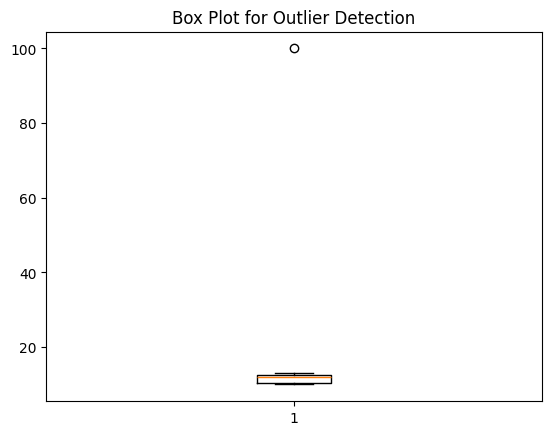

In [126]:
import matplotlib.pyplot as plt 

# Sample dataset 
data = [10, 12, 13, 12, 11, 10, 100] 

# Create a box plot 
plt.boxplot(data) 
plt.title("Box Plot for Outlier Detection") 
plt.show()

#### Scatter Plot Example:

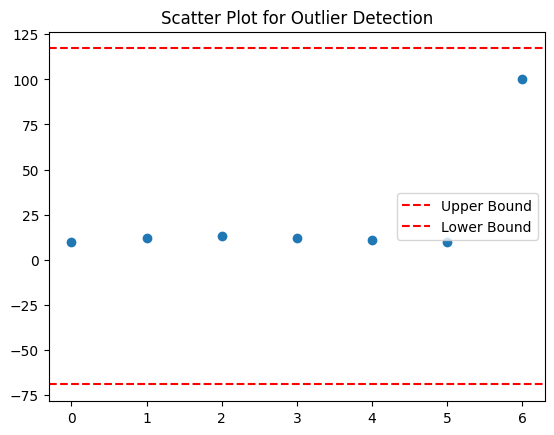

In [127]:
import matplotlib.pyplot as plt 

# Sample dataset 
data = [10, 12, 13, 12, 11, 10, 100] 

# Scatter plot 
plt.scatter(range(len(data)), data) 
plt.axhline(y=np.mean(data) + 3 * np.std(data), color='r', linestyle='--', label='Upper Bound') 
plt.axhline(y=np.mean(data) - 3 * np.std(data), color='r', linestyle='--', label='Lower Bound') 
plt.legend() 
plt.title("Scatter Plot for Outlier Detection") 
plt.show()

###
---

### **Conclusion**

Outlier detection is an essential preprocessing step for ensuring robust machine learning models. Choosing the appropriate method depends on the dataset's characteristics and the type of analysis. For multidimensional data, methods like Isolation Forest, LOF, and One-Class SVM are effective, while simpler methods like Z-Score and IQR are suitable for univariate data.

###
---

### **Example with real data set**

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [129]:
data = pd.read_csv('../datasets/insurance.csv')
data.sample(5)

,age,sex,bmi,children,smoker,region,charges
188,41,female,32.200,1,no,southwest,6775.96100
1090,47,male,36.190,0,yes,southeast,41676.08110
253,27,male,30.300,3,no,southwest,4260.74400
162,54,male,39.600,1,no,southwest,10450.55200
1071,63,male,31.445,0,no,northeast,13974.45555


In [130]:
data.shape

(1338, 7)

In [131]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### **Detecting Outlier in Last Column**

- **By plotting Data**

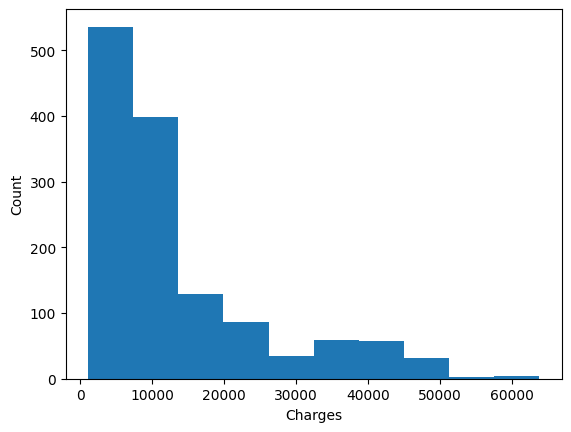

In [132]:
plt.hist(data['charges'])
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

- **By Z-Score**

In [133]:
from scipy.stats import zscore

In [134]:
z_score = zscore(data["charges"])
z_score

0       0.298584
1      -0.953689
2      -0.728675
3       0.719843
4      -0.776802
          ...   
1333   -0.220551
1334   -0.914002
1335   -0.961596
1336   -0.930362
1337    1.311053
Name: charges, Length: 1338, dtype: float64

In [135]:
z_score.describe()

count    1.338000e+03
mean    -8.098488e-17
std      1.000374e+00
min     -1.003557e+00
25%     -7.046504e-01
50%     -3.212089e-01
75%      2.783441e-01
max      4.171663e+00
Name: charges, dtype: float64

In [136]:
import matplotlib.pyplot as plt

<Axes: >

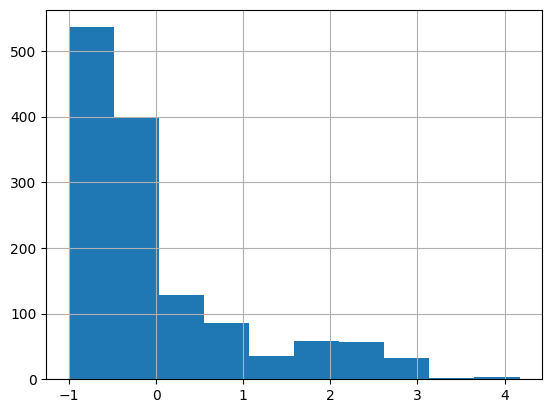

In [137]:
z_score.hist()

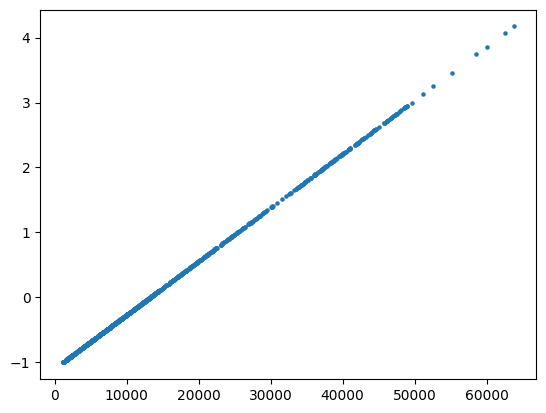

In [138]:
plt.scatter(data["charges"], z_score, s=5)
plt.show()

#### **Remove Outlier in Last Column**

- Considering z_score > 3 as an outlier

In [139]:
data["zscore"] = z_score
data.sample(5)

,age,sex,bmi,children,smoker,region,charges,zscore
540,34,female,38.000,3,no,southwest,6196.44800,-0.584361
150,35,male,24.130,1,no,northwest,5125.21570,-0.672853
1041,18,male,23.085,0,no,northeast,1704.70015,-0.955412
419,63,female,26.980,0,yes,northwest,28950.46920,1.295284
1224,41,male,23.940,1,no,northeast,6858.47960,-0.529673


In [140]:
new_data = data[data["zscore"] < 3]
new_data.tail(5)

,age,sex,bmi,children,smoker,region,charges,zscore
1333,50,male,30.97,3,no,northwest,10600.5483,-0.220551
1334,18,female,31.92,0,no,northeast,2205.9808,-0.914002
1335,18,female,36.85,0,no,southeast,1629.8335,-0.961596
1336,21,female,25.80,0,no,southwest,2007.9450,-0.930362
1337,61,female,29.07,0,yes,northwest,29141.3603,1.311053


In [141]:
new_data.shape

(1331, 8)

In [142]:
data.shape

(1338, 8)

In [143]:
new_data = new_data.drop("zscore", axis=1)
new_data.sample(5)

,age,sex,bmi,children,smoker,region,charges
1287,36,female,25.90,1,no,southwest,5472.4490
177,54,male,29.20,1,no,southwest,10436.0960
504,38,female,28.93,1,no,southeast,5974.3847
11,62,female,26.29,0,yes,southeast,27808.7251
1244,18,male,33.33,0,no,southeast,1135.9407


#### **Check the process by plotting**

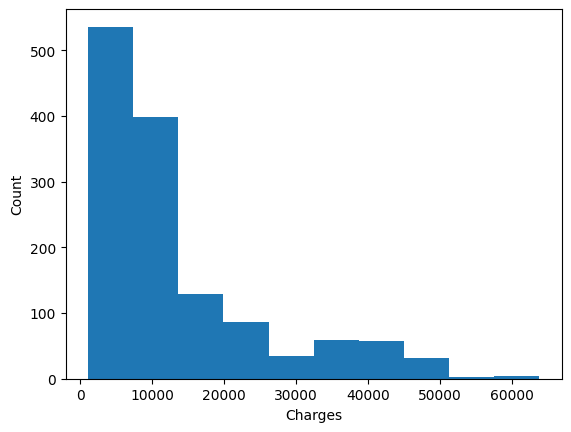

In [144]:
plt.hist(data['charges']) # for old data
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

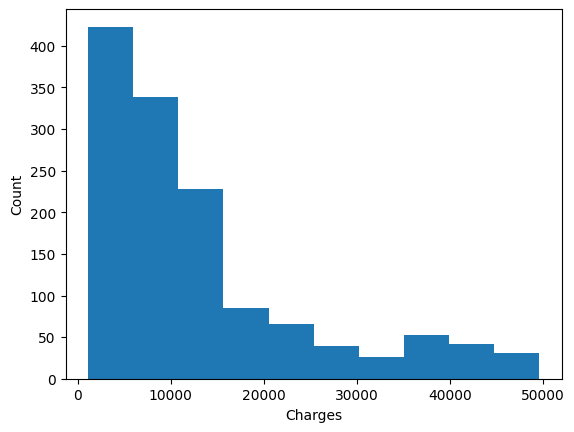

: 

In [ ]:
plt.hist(new_data['charges']) # for new data
plt.xlabel('Charges')
plt.ylabel('Count')

###
---